# Random Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Stationary Random Processes

### Definition

When the average statistical properties of a random process do not depend on the time index $k$, this process is termed as [*stationary random process*](https://en.wikipedia.org/wiki/Stationary_process). This can be expressed formally as

\begin{equation}
E\{ f(x[k_1], x[k_2], \dots) \} = E\{ f(x[k_1 + \Delta], x[k_2 + \Delta], \dots) \}
\end{equation}

where $\Delta \in \mathbb{Z}$ denotes an arbitrary shift of the sample index $k$. Above condition has to hold for all possible mapping functions $f(\cdot)$. From this definition it becomes clear that

* random signals of finite length and
* deterministic signals $s[k] \neq C$ with $C \in \mathbb{R}$

cannot be stationary random processes in a strict sense. However, in practice it is often assumed to be sufficient if above condition holds within a finite interval of sample indexes of a random signal.

### Cumulative Distribution Functions and Probability Density Functions

It follows from above definition of a stationary process, that the univariate cumulative distribution function (CDF) of a stationary random process does not depend on the time index $k$

\begin{equation}
P_x(\theta, k) = P_x(\theta)
\end{equation}

the same holds for the univariate probability density function (PDF)

\begin{equation}
p_x(\theta, k) = p_x(\theta)
\end{equation}

The bivariate CDF of two stationary random signals $x[k]$ and $y[k]$ depends only on the difference $\kappa = k_x - k_y$

\begin{equation}
P_{xy}(\theta_x, \theta_y, k_x, k_y) = P_{xy}(\theta_x, \theta_y, \kappa)
\end{equation}

The same holds for the bivariate PDF

\begin{equation}
p_{xy}(\theta_x, \theta_y, k_x, k_y) = p_{xy}(\theta_x, \theta_y, \kappa)
\end{equation}

### First-Order Ensemble Averages

According to above definition of stationarity, for the first-order ensemble average of a stationary process the following relation must hold

\begin{equation}
E\{ f(x[k]) \} = E\{ f(x[k + \Delta]) \}
\end{equation}

hence it does not depend on the time index $k$. For the linear mean we consequently yield 

\begin{equation}
\mu_x[k] = \mu_x
\end{equation}

and for the variance 

\begin{equation}
\sigma_x^2[k] = \sigma_x^2
\end{equation}

### Cross- and Auto-Correlation Function

It follows by introducing the PDF's properties of a stationary process into the definition of the cross-correlation function (CCF) and auto-correlation function (ACF) that

\begin{equation}
\varphi_{xy}[k_x, k_y] = \varphi_{xy}[\kappa] = E\{ x[k] \cdot y[k-\kappa]\} = E\{ x[k+\kappa] \cdot y[k]\}
\end{equation}

and

\begin{equation}
\varphi_{xx}[k_1, k_2] = \varphi_{xx}[\kappa] = E\{ x[k] \cdot x[k-\kappa]\} = E\{ x[k+\kappa] \cdot x[k]\}
\end{equation}

where for the latter $\kappa = k_1 - k_2$.

## Wide-Sense Stationary Random Processes

### Definition

The definition of a stationary random process in the previous section must hold for any mapping function $f(\cdot)$. In practice this cannot be checked in a strict sense. For a wide-sense stationary (WSS) random process the conditions for stationarity must hold only for linear mappings. This leads to the following two conditions a WSS random process has to fulfill

\begin{equation}
E\{ x[k_1] \cdot x[k_2] \} = E\{ x[k_1 + \Delta] \cdot x[k_2 + \Delta] \}
\end{equation}

and

\begin{equation}
E\{ x[k] \} = E\{ x[k + \Delta] \}
\end{equation}

A random signal of finite length cannot be WSS in a strict sense.

### Example - Evaluation of Wide-Sense Stationarity

From above definition of a WSS process it is evident that it is sufficient to check the time dependence of the linear mean $x_\mu[k]$ and the auto-correlation function $\varphi_{xx}[k_1, k_2]$. Both quantities are estimated and plotted for two different random processes.

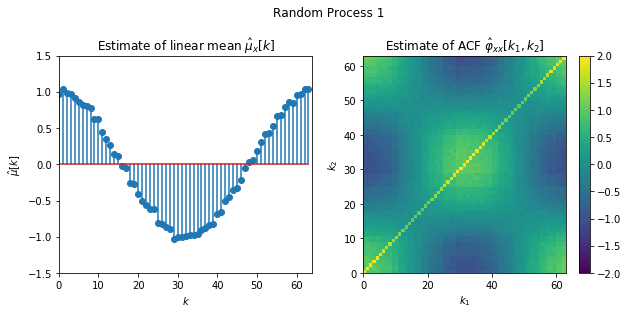

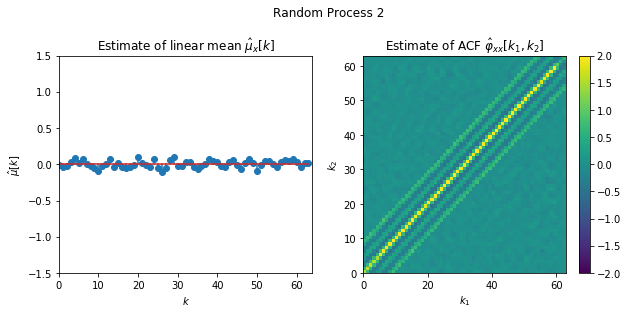

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

L = 64  # number of random samples
N = 1000  # number of sample functions

# generate sample functions
np.random.seed(1)
x = np.random.normal(size=(N, L))
x1 = x + np.tile(np.cos(2*np.pi/L*np.arange(L)), [N,1])
h = 2*np.fft.irfft([1,1,1,0,0,0])
x2 = np.asarray([np.convolve(x[n,:], h, mode='same') for n in range(N)])

# compute and plot results
def compute_plot_results(x):
    
    # estimate linear mean by ensemble average
    mu = 1/N * np.sum(x, 0)
    # estimate the auto-correlation function
    acf = np.zeros((L, L))
    for n in range(L):
        for m in range(L):
            acf[n, m] = 1/N * np.sum(x[:, n]*x[:, m], 0)
    
    plt.subplot(121)
    plt.stem(mu)
    plt.title(r'Estimate of linear mean $\hat{\mu}_x[k]$')
    plt.xlabel(r'$k$')
    plt.ylabel(r'$\hat{\mu}[k]$')
    plt.axis([0, L, -1.5, 1.5])

    plt.subplot(122)
    plt.pcolor(np.arange(L), np.arange(L), acf, vmin=-2, vmax=2)
    plt.title(r'Estimate of ACF $\hat{\varphi}_{xx}[k_1, k_2]$')
    plt.xlabel(r'$k_1$')
    plt.ylabel(r'$k_2$')
    plt.colorbar()
    plt.autoscale(tight=True)

    
plt.figure(figsize = (10, 4))
plt.gcf().suptitle('Random Process 1', fontsize=12, y=1.05)
compute_plot_results(x1)

plt.figure(figsize = (10, 4))
plt.gcf().suptitle('Random Process 2', fontsize=12, y=1.05)
compute_plot_results(x2)

**Exercise**

* Which process can be assumed to be WSS? Why?
* Increase the number `N` of sample functions. Do the results support your initial assumption? 

Solution: Inspection of the estimated linear mean $\hat{\mu}_x[k]$ for the first random process reveals that it is highly dependent on the sample index $k$. The same holds for the ACF which depends on both sample indexes $k_1$ and $k_2$. For the second random process, the estimated linear mean can be assumed to be approximately zero. Its ACF depends approximately only on the difference $\kappa = k_1 - k_2$, as can be concluded from the diagonal structures in the plot. Increasing the number of sample functions $N$ increases the certainty of the estimates in the statistical sense.

## Higher-Order Temporal Averages

Ensemble averages are defined as the average across all sample functions $x_n[k]$ for a particular time index $k$. So far, averaging over the sample index $k$ of one sample function was not considered. Such averaging is termed commonly as temporal averaging since the sample index $k$ represents time in many cases. For a stationary process, the higher-order temporal average along the $n$-th sample function is defined as

\begin{equation}
\overline{ f(x_n[k], x_n[k-\kappa_1], x_n[k-\kappa_2], \dots) } = \lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k = -K}^{K} f(x_n[k], x_n[k-\kappa_1], x_n[k-\kappa_2], \dots)
\end{equation}

where $\kappa_i \in \mathbb{Z} \; \forall i$. The introduced statistical measures, like the linear mean, variance and correlation functions, can be computed for each sample function by temporal averaging by using the respective mapping functions $f(\cdot)$ introduced above. The linear mean as temporal average of the $n$-th sample function $x_n[k]$ is for instance given by

\begin{equation}
\overline{x_n[k]} = \lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k = -K}^{K} x_n[k]
\end{equation}

## Ergodic Random Processes

An [ergodic process](https://en.wikipedia.org/wiki/Ergodic_process) is a stationary random process whose higher-order temporal averages of all sample functions are equal to the ensemble averages

\begin{equation}
\overline{ f(x_n[k], x_n[k-\kappa_1], x_n[k-\kappa_2], \dots) } = E\{  f(x[k], x[k-\kappa_1], x[k-\kappa_2], \dots)  \} \;\; \forall n
\end{equation}

This implies that all higher-order temporal averages are equal. Any sample function from the process represents the average statistical properties of the entire process. The ensemble averages for a stationary and ergodic random process are given by the temporal averages of one sample function. This result is very important for the practical computation of statistical properties of random signals.

## Wide-Sense Ergodic Random Processes

### Definition

As for a WSS process, the conditions for ergodicity have to hold only for linear mappings $f(\cdot)$. Under the assumption of a WSS process, the following two conditions have to be met by a wide-sense ergodic random process

\begin{equation}
\overline{ x_n[k] \cdot x_n[k-\kappa] } = E\{  x[k] \cdot x[k-\kappa]  \} \;\; \forall n
\end{equation}

and

\begin{equation}
\overline{ x_n[k] } = E\{  x[k] \} \;\; \forall n
\end{equation}

### Example - Evaluation of Wide-Sense Ergodicity

In the following example, the linear mean and autocorrelation function are computed as temporal and ensemble averages for three random processes. The plots show the estimated temporal averages $\overline{ x_n[k] }$ and $\overline{ x_n[k] \cdot x_n[k-\kappa] }$ on the right-hand side of the sample functions $x_n[k]$. Note, the linear mean as temporal average is a scalar value whose value is illustrated by a bar plot. The estimated ensemble averages $E\{  x[k] \}$ and $E\{  x[k_1] \cdot x[k_2]  \}$ are shown below the sample functions to indicate the averaging across sample functions.

In [2]:
L = 64  # number of random samples
N = 10000  # number of sample functions

# generate sample functions
np.random.seed(11)
x = np.random.normal(size=(N, L))
k = np.arange(L)
x1 = x + np.tile(np.cos(2*np.pi/L*k), [N, 1])
x2 = x + np.tile([np.ones(L), -np.ones(L)], [N//2, 1])
x3 = x + np.ones([N, L])

# function to compute and plot results
def compute_plot_results(x):
    
    # estimate linear mean by ensemble average
    mu = 1/N * np.sum(x, 0)
    # estimate the auto-correlation function by ensemble average
    acf = np.zeros((L, L))
    for n in range(L):
        for m in range(L):
            acf[n, m] = 1/N * np.sum(x[:, n]*x[:, m], 0)
    # estimate linear mean as temporal average
    mut = 1/L * np.sum(x, 1)
    # estimate the auto-correlation function as temporal average
    acft = np.zeros((N, L))
    for n in range(N):
        acft[n, :] = np.correlate(x[n, :], x[n, :], mode='same')
    kappa = np.arange(L) - L//2
    
    for n in range(2):
        plt.figure(figsize = (10, 5))
        plt.subplot(131)
        plt.stem(x[n, :])
        plt.title(r'Sample function $x_%d[k]$'%n)
        plt.xlabel(r'$k$')
        plt.ylabel(r'$x_%d[k]$'%n)
        plt.axis([0, L, -4, 4])

        plt.subplot(132)
        plt.bar(-0.4, mut[n])
        plt.title(r'Linear mean $\overline{ x_%d[k] }$'%n)
        plt.ylabel(r'$\hat{\mu}_{x,%d}$'%n)
        plt.axis([-.5, .5, -1.5, 1.5])
        
        plt.subplot(133)
        plt.stem(kappa, acft[n, :])
        plt.title(r'Autocorrelation $\overline{ x_%d[k] \cdot x_%d[k-\kappa] }$'%(n,n))
        plt.xlabel(r'$\kappa$')
        plt.ylabel(r'$\hat{\varphi}_{xx,%d}[\kappa]$'%n)
        plt.axis([-L//2, L//2, -30, 150])
        plt.tight_layout()
    
    plt.figure(figsize = (10, 5))
    plt.subplot(131)
    plt.stem(mu)
    plt.title(r'Linear mean $E\{  x[k] \}$')
    plt.xlabel(r'$k$')
    plt.ylabel(r'$\hat{\mu}[k]$')
    plt.axis([0, L, -1.5, 1.5])
    
    plt.figure(figsize = (4, 4))
    plt.pcolor(k, k, acf, vmin=-2, vmax=2)
    plt.title(r'ACF $E\{  x[k_1] \cdot x[k_2]  \}$')
    plt.xlabel(r'$k_1$')
    plt.ylabel(r'$k_2$')
    plt.colorbar()
    plt.autoscale(tight=True)

**Random Process 1**

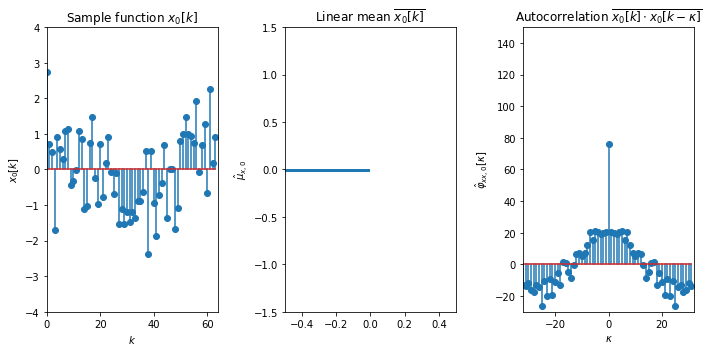

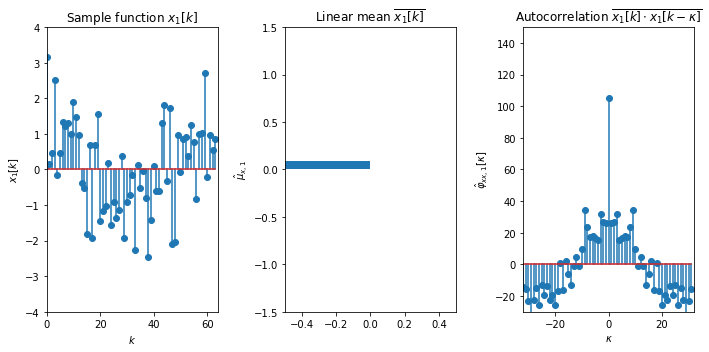

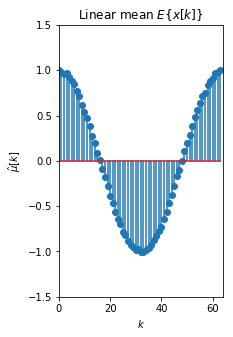

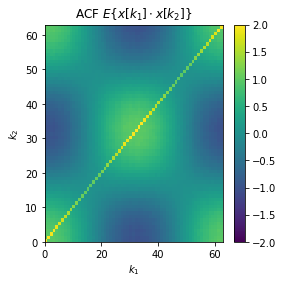

In [3]:
compute_plot_results(x1)

**Random Process 2**

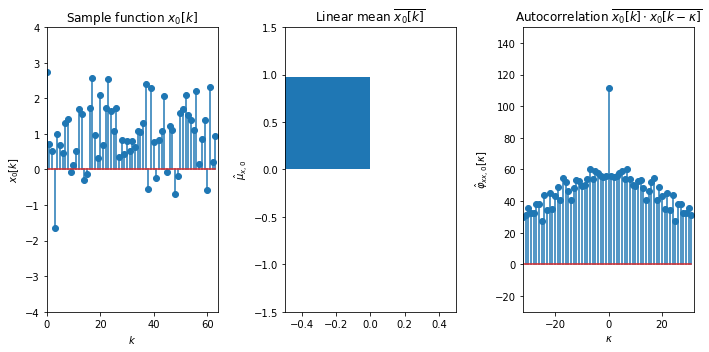

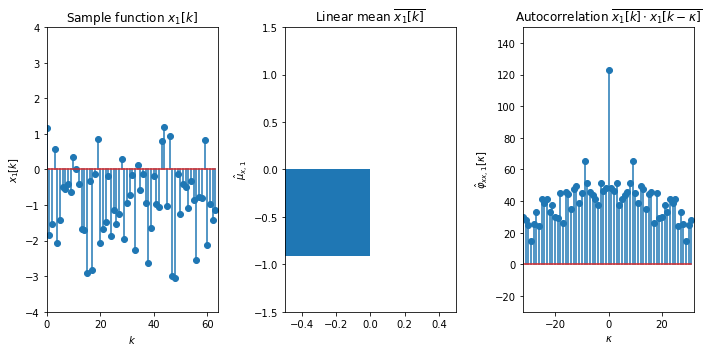

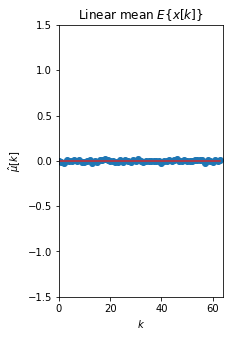

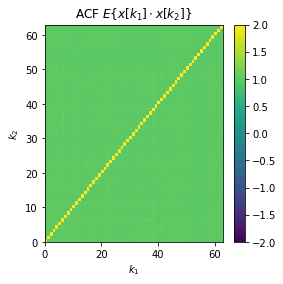

In [4]:
compute_plot_results(x2)

**Random Process 3**

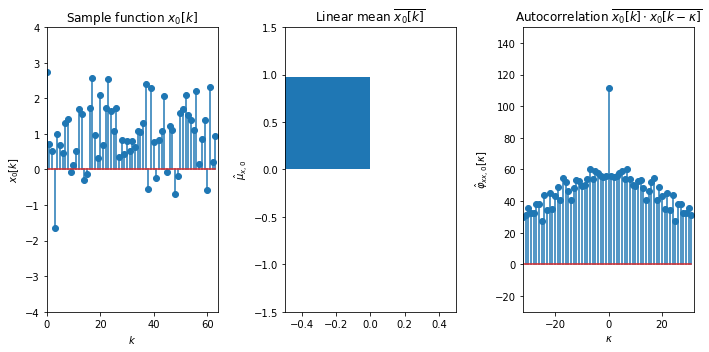

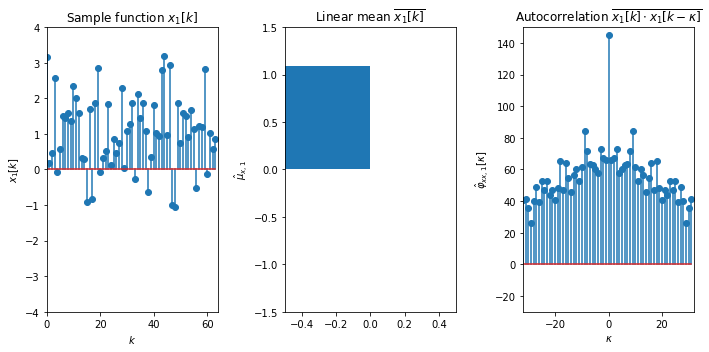

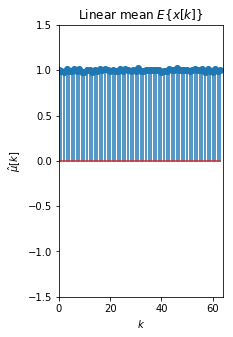

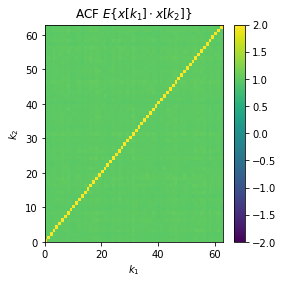

In [5]:
compute_plot_results(x3)

**Exercise**

* Which process can be assumed to be stationary and/or ergodic? Why?

Solution: The linear mean $\mu_x[k]$ estimated by the ensemble average of the first process depends on the sample index $k$. Consequently, this process is not stationary and also not ergodic. Inspection of the linear mean and auto-correlation function estimated by the ensemble averages of the second random process reveals that this processed can be assumed to be WSS. The linear mean as temporal average of the sample functions is not constant with respect to the sample functions. Consequently, this process can be assumed to be WSS but not ergodic. The third process can be assumed to be wide-sense stationary and ergodic.


**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016-2017*.